# Linear Regression using Linear Algebra

In this demo, we will perform linear regression using the **Normal Equation** method in linear algebra. The Normal Equation allows us to find the best-fit line for a dataset by solving the equation analytically.

### Normal Equation

The equation to find the parameters (weights) of the linear model is:


$\theta = (X^TX)^{-1} X^T y$


Where:
- $X$ is the matrix of input features (with a column of ones for the bias term).
- $y$ is the vector of output values.
- $\theta$ is the vector of parameters (the coefficients for the regression line).

### Steps:
1. **Data Generation**: We generate some random linear data with a bit of noise for demonstration purposes.
2. **Bias Term**: We add a bias term (a column of ones) to the feature matrix to account for the intercept in the linear regression.
3. **Normal Equation**: We compute the best-fit parameters (intercept and slope) using the normal equation.
4. **Visualization**: We plot the data points and the best-fit line to visually illustrate the linear regression.


## Python Code Block:

Intercept: 4.22215107744723, Slope: 2.968467510701018


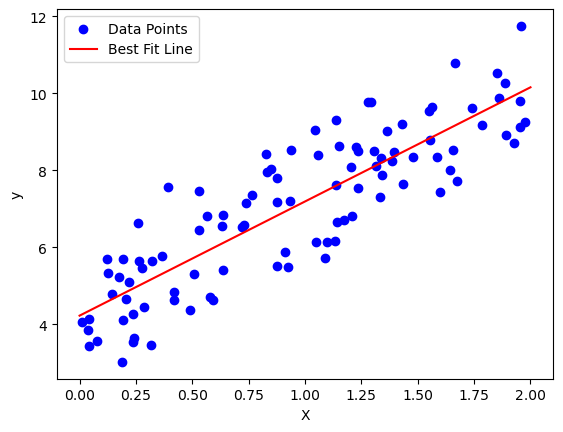

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias (ones) column to X
X_b = np.c_[np.ones((100, 1)), X]

# Compute theta using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Extract the parameters (intercept and slope)
intercept, slope = theta_best[0][0], theta_best[1][0]

print(f"Intercept: {intercept}, Slope: {slope}")

# Predictions based on the fitted model
X_new = np.array([[0], [2]])  # Predict for X values 0 and 2
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term
y_predict = X_new_b.dot(theta_best)

# Plot the data and the fitted regression line
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X_new, y_predict, color="red", label="Best Fit Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## Python Code Block Using Scikit-Learn

Intercept: 4.222151077447232, Slope: 2.968467510701018


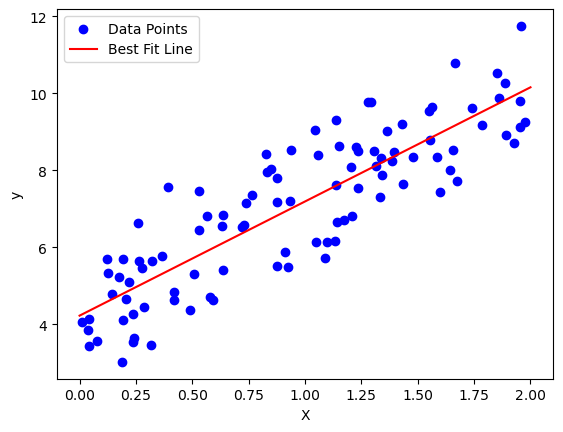

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Create a LinearRegression model
lin_reg = LinearRegression()

# Fit the model to the data
lin_reg.fit(X, y)

# Extract the intercept and slope (coefficients)
intercept = lin_reg.intercept_[0]
slope = lin_reg.coef_[0][0]

print(f"Intercept: {intercept}, Slope: {slope}")

# Make predictions
X_new = np.array([[0], [2]])  # Predict for X values 0 and 2
y_predict = lin_reg.predict(X_new)

# Plot the data and the fitted regression line
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X_new, y_predict, color="red", label="Best Fit Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## Python Code Block Using Gradient Descent

# Linear Regression using Gradient Descent

In this demo, we will perform linear regression using **Gradient Descent** instead of the normal equation or `scikit-learn`'s implementation. Gradient descent is an iterative optimization algorithm used to minimize a function, in this case, the **cost function** (Mean Squared Error) of our linear regression model.

### Cost Function:

The cost function we aim to minimize is:

$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$

Where:
- $m$ is the number of training examples.
- $\hat{y}^{(i)}$ is the predicted value for the \(i\)-th training example.
- $y^{(i)}$ is the actual value for the \(i\)-th training example.
- $J(\theta)$ is the cost function (Mean Squared Error).

### Gradient Descent Update Rule:

In each iteration of gradient descent, we update the parameters \(\theta_0\) (intercept) and \(\theta_1\) (slope) using the following rules:


$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$


Where:
- $\theta_j$ represents the parameters (weights) of the model.
- $\alpha$ is the learning rate (step size).
- $\frac{\partial J(\theta)}{\partial \theta_j}$ is the partial derivative of the cost function with respect to $\theta_j$.

The partial derivatives are computed as:

$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
$
$
\frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x^{(i)}
$

We update both the intercept $\theta_0$ and the slope $\theta_1$ in each iteration until the cost function converges to a minimum.


Intercept: 4.222151077447219, Slope: 2.968467510701028


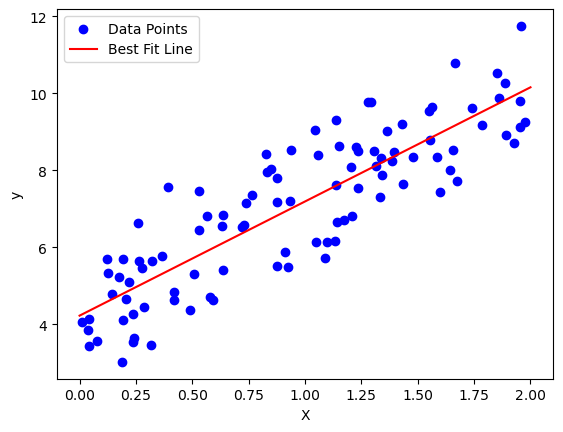

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias (ones) column to X
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters (weights) for the model
theta = np.random.randn(2, 1)  # Random initialization
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)

# Gradient Descent Algorithm
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients

# Extract the intercept and slope (parameters)
intercept, slope = theta[0][0], theta[1][0]

print(f"Intercept: {intercept}, Slope: {slope}")

# Predictions based on the fitted model
X_new = np.array([[0], [2]])  # Predict for X values 0 and 2
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term
y_predict = X_new_b.dot(theta)

# Plot the data and the fitted regression line
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X_new, y_predict, color="red", label="Best Fit Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
